In [41]:
#imports
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import recommenderClass as recommender
import Evaluation as eval
import time

### Read the datasets

In [4]:
#define dataset locations
ids_file='https://static.turi.com/datasets/millionsong/10000.txt' # is a file loc with song ids, user ids and listen count
metadata_loc='https://static.turi.com/datasets/millionsong/song_data.csv' # is a file loc which contains song names, song ids, artist details

#combine both of these dataframes such that there exists 1 dataframe with prominence given to song id, user id and listen count
song_pd=pd.read_table('song_metadata.txt',header=None)
song_pd.columns=['user_id','song_id','listen_count']
metadata_pd=pd.read_csv('song_data.csv')

song_df=pd.merge(song_pd,metadata_pd.drop_duplicates(['song_id']), on='song_id', how='left')

In [5]:
#visualize combined dataset
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [6]:
len(song_df)

2000000

In [7]:
#define a new column entry called 'song' that combines title and artist name
song_df=song_df.head(10000)
song_df['song']=song_df['title'].map(str)+"-"+song_df['artist_name'].map(str)


In [8]:
#get the aggregate listen count and percentage value for each song and sort the data
songs_count=song_df.groupby(['song']).agg({'listen_count':'count'}).reset_index()
grouped_sum=songs_count['listen_count'].sum()
songs_count['percentage']=songs_count['listen_count']/grouped_sum
songs_count.sort_values(['listen_count','song'], ascending=[0,1])


,song,listen_count,percentage
3660,Sehr kosmisch-Harmonia,45,0.0045
4678,Undo-Björk,32,0.0032
5105,You're The One-Dwight Yoakam,32,0.0032
1071,Dog Days Are Over (Radio Edit)-Florence + The ...,28,0.0028
3655,Secrets-OneRepublic,28,0.0028
4378,The Scientist-Coldplay,27,0.0027
4712,Use Somebody-Kings Of Leon,27,0.0027
3476,Revelry-Kings Of Leon,26,0.0026
1387,Fireflies-Charttraxx Karaoke,24,0.0024
1862,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,0.0023


In [9]:
unique_users=song_df['user_id'].unique()
len(unique_users)

365

In [10]:
songs_count['percentage'].sum()

0.999999999999944

In [11]:
#unique song count
len(song_df['song'].unique())


5151

In [12]:
#creating a song recommender based on popularity based sys and colloborative system
#creating train-test data with testdata size being 20%
trainData,testData=train_test_split(song_df,test_size=0.20,random_state=0)
print(trainData.head(5))

                                       user_id             song_id  \
7389  94d5bdc37683950e90c56c9b32721edb5d347600  SOXNZOW12AB017F756   
9275  1012ecfd277b96487ed8357d02fa8326b13696a5  SOXHYVQ12AB0187949   
2995  15415fa2745b344bce958967c346f2a89f792f63  SOOSZAZ12A6D4FADF8   
5316  ffadf9297a99945c0513cd87939d91d8b602936b  SOWDJEJ12A8C1339FE   
356   5a905f000fc1ff3df7ca807d57edb608863db05d  SOAMPRJ12A8AE45F38   

      listen_count                 title  \
7389             2      Half Of My Heart   
9275             1  The Beautiful People   
2995             1     Sanctify Yourself   
5316             4     Heart Cooks Brain   
356             20                 Rorol   

                                                release      artist_name  \
7389                                     Battle Studies       John Mayer   
9275             Antichrist Superstar (Ecopac Explicit)   Marilyn Manson   
2995                             Glittering Prize 81/92     Simple Minds   
5316  Ever

In [13]:
trainData.keys()

Index(['user_id', 'song_id', 'listen_count', 'title', 'release', 'artist_name',
       'year', 'song'],
      dtype='object')

In [14]:
trainData['song_id'].unique()

array(['SOXNZOW12AB017F756', 'SOXHYVQ12AB0187949', 'SOOSZAZ12A6D4FADF8',
       ..., 'SOONJMQ12A8C137E6D', 'SOYVCJU12A67AD8617',
       'SOHKXRA12AB017E7F8'], dtype=object)

In [15]:
trainData['user_id'].unique()

array(['94d5bdc37683950e90c56c9b32721edb5d347600',
       '1012ecfd277b96487ed8357d02fa8326b13696a5',
       '15415fa2745b344bce958967c346f2a89f792f63',
       'ffadf9297a99945c0513cd87939d91d8b602936b',
       '5a905f000fc1ff3df7ca807d57edb608863db05d',
       'bd4c6e843f00bd476847fb75c47b4fb430a06856',
       '9c4e14bbd043846b632d3737f08104dcaeb88142',
       '484b69dd013df1ec0cfd504886d4f647cb32b08f',
       '53ba380d234fd6022818340983570354ee207f6b',
       'f608c215606e6421a429ea28ad08243241d5347d',
       '80aa05e1251892949df7c7b1f61b6ce8ffa27aec',
       '17aa9f6dbdf753831da8f38c71b66b64373de613',
       'ca80fbb6d0deb3cae53763099e2cae7306f005ec',
       'fca15b7964a099b2860dfdb158a2430fb10c4384',
       '5aa89364746d7f350d35a403da8f397bd9d32b41',
       '85952991b8e3ca5803a08b0b2f9c6d71abf9bb5b',
       '7e2b716907a9a295d92c2f35d7e260aeee2b32cf',
       '884209a41deb55df792f074bccf8af1c1c31768b',
       'ae99321be6e9a79bb9c2dd4b2aa8b49fdb9efdf8',
       'bd8475385f0aa78830fa6df

# Lets look at how popularity based recommendation model works


In [16]:
p_recommender=recommender.popularityRecommender()

In [17]:
p_recommender.create(trainData,'user_id','song')


printing 2 rows of training data
                        song  score
0          & Down-Boys Noize      3
1  '97 Bonnie & Clyde-Eminem      2


In [18]:
user_id=unique_users[5]
p_recommender.recommend(user_id)

generating recommendations for user_id 4bd88bfb25263a75bbdd467e74018f4ae570e5df


,user_id,song,score,rank
3194,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Sehr kosmisch-Harmonia,37,1.0
4083,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Undo-Björk,27,2.0
931,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Dog Days Are Over (Radio Edit)-Florence + The ...,24,3.0
4443,4bd88bfb25263a75bbdd467e74018f4ae570e5df,You're The One-Dwight Yoakam,24,4.0
3189,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Secrets-OneRepublic,21,5.0
3034,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Revelry-Kings Of Leon,21,6.0
4112,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Use Somebody-Kings Of Leon,21,7.0
1207,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Fireflies-Charttraxx Karaoke,20,8.0
1577,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hey_ Soul Sister-Train,19,9.0
3824,4bd88bfb25263a75bbdd467e74018f4ae570e5df,The Scientist-Coldplay,19,10.0


lets try to understand how the code in method 'popularityRecommender.create()' is written

In [19]:

trainData.keys()

Index(['user_id', 'song_id', 'listen_count', 'title', 'release', 'artist_name',
       'year', 'song'],
      dtype='object')

In [20]:
groupedData=trainData.groupby(['song']).agg({'user_id':'count'}).reset_index()
groupedData

,song,user_id
0,& Down-Boys Noize,3
1,'97 Bonnie & Clyde-Eminem,2
2,'Round Midnight-Miles Davis,2
3,'Till I Collapse-Eminem / Nate Dogg,5
4,(I Cant Get No) Satisfaction-Cat Power,1
5,(I Can't Get Me No) Satisfaction-Devo,1
6,(Nice Dream)-Radiohead,2
7,(Sittin' On) The Dock Of The Bay-Otis Redding,2
8,(They Long To Be) Close To You-Carpenters,3
9,(You Drive Me) Crazy (The Stop Remix!)-Britney...,2


In [21]:
groupedData.rename(columns={'user_id':'score'}, inplace=True)
groupedData

,song,score
0,& Down-Boys Noize,3
1,'97 Bonnie & Clyde-Eminem,2
2,'Round Midnight-Miles Davis,2
3,'Till I Collapse-Eminem / Nate Dogg,5
4,(I Cant Get No) Satisfaction-Cat Power,1
5,(I Can't Get Me No) Satisfaction-Devo,1
6,(Nice Dream)-Radiohead,2
7,(Sittin' On) The Dock Of The Bay-Otis Redding,2
8,(They Long To Be) Close To You-Carpenters,3
9,(You Drive Me) Crazy (The Stop Remix!)-Britney...,2


In [22]:
groupedData=groupedData.sort_values(['score'],ascending=False)

In [23]:
groupedData['rank']=groupedData['score'].rank(ascending=0,method='first')
groupedData

,song,score,rank
3194,Sehr kosmisch-Harmonia,37,1.0
4083,Undo-Björk,27,2.0
931,Dog Days Are Over (Radio Edit)-Florence + The ...,24,3.0
4443,You're The One-Dwight Yoakam,24,4.0
3189,Secrets-OneRepublic,21,5.0
3034,Revelry-Kings Of Leon,21,6.0
4112,Use Somebody-Kings Of Leon,21,7.0
1207,Fireflies-Charttraxx Karaoke,20,8.0
1577,Hey_ Soul Sister-Train,19,9.0
3824,The Scientist-Coldplay,19,10.0


In [24]:
user_recommendations=groupedData
user_id=5
user_recommendations['user_id']=user_id
cols=user_recommendations.columns.tolist()
cols

['song', 'score', 'rank', 'user_id']

In [25]:
cols[-1:]+cols[:-1]

['user_id', 'song', 'score', 'rank']

# Lets look at how item based similarity recommendation model works

In [26]:
irecommender=recommender.item_similarity_recommender()


In [27]:
irecommender.create(trainData,'user_id','song')

### Get unique songs for user 5

In [35]:
user_id=unique_users[5]
user_items=irecommender.get_unique_songs_for_user(user_id)

print('Training data for user 5')
for i in user_items:
    print(i)
print('Recommended song list is')    
irecommender.recommend(user_id)



Training data for user 5
Just Lose It-Eminem
Without Me-Eminem
16 Candles-The Crests
Speechless-Lady GaGa
Push It-Salt-N-Pepa
Ghosts 'n' Stuff (Original Instrumental Mix)-Deadmau5
Say My Name-Destiny's Child
My Dad's Gone Crazy-Eminem / Hailie Jade
The Real Slim Shady-Eminem
Somebody To Love-Justin Bieber
Forgive Me-Leona Lewis
Missing You-John Waite
Ya Nada Queda-Kudai
Recommended song list is
No. of unique songs for the user: 13
no. of unique songs in the training set: 4483
non zero value in coocurence matrix 2097


,user_id,song,score,rank
0,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Superman-Eminem / Dina Rae,0.088692,1.0
1,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Mockingbird-Eminem,0.067663,2.0
2,4bd88bfb25263a75bbdd467e74018f4ae570e5df,I'm Back-Eminem,0.065385,3.0
3,4bd88bfb25263a75bbdd467e74018f4ae570e5df,U Smile-Justin Bieber,0.064525,4.0
4,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Here Without You-3 Doors Down,0.062293,5.0
5,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hellbound-J-Black & Masta Ace,0.055769,6.0
6,4bd88bfb25263a75bbdd467e74018f4ae570e5df,The Seed (2.0)-The Roots / Cody Chestnutt,0.052564,7.0
7,4bd88bfb25263a75bbdd467e74018f4ae570e5df,I'm The One Who Understands (Edit Version)-War,0.052564,8.0
8,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Falling-Iration,0.052564,9.0
9,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Armed And Ready (2009 Digital Remaster)-The Mi...,0.052564,10.0


### Get unique users for user 7

In [36]:
user_id=unique_users[7]
user_items=irecommender.get_unique_songs_for_user(user_id)

print('Training data for user 7')
for i in user_items:
    print(i)
print('Recommended song list is')    
irecommender.recommend(user_id)


Training data for user 7
Swallowed In The Sea-Coldplay
Life In Technicolor ii-Coldplay
Life In Technicolor-Coldplay
The Scientist-Coldplay
Trouble-Coldplay
Strawberry Swing-Coldplay
Lost!-Coldplay
Clocks-Coldplay
Recommended song list is
No. of unique songs for the user: 8
no. of unique songs in the training set: 4483
non zero value in coocurence matrix 3429


,user_id,song,score,rank
0,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,She Just Likes To Fight-Four Tet,0.281579,1.0
1,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Warning Sign-Coldplay,0.281579,2.0
2,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,We Never Change-Coldplay,0.281579,3.0
3,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Puppetmad-Puppetmastaz,0.281579,4.0
4,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,God Put A Smile Upon Your Face-Coldplay,0.281579,5.0
5,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Susie Q-Creedence Clearwater Revival,0.281579,6.0
6,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,The Joker-Fatboy Slim,0.281579,7.0
7,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Korg Rhythm Afro-Holy Fuck,0.281579,8.0
8,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,This Unfolds-Four Tet,0.281579,9.0
9,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,high fives-Four Tet,0.281579,10.0


### Display songs that have similarity 

In [37]:
irecommender.get_similar_items(['This Unfolds-Four Tet'])


no. of unique songs in the training set: 4483
non zero value in coocurence matrix 324


,user_id,song,score,rank
0,,She Just Likes To Fight-Four Tet,1.0,1.0
1,,Warning Sign-Coldplay,1.0,2.0
2,,We Never Change-Coldplay,1.0,3.0
3,,Puppetmad-Puppetmastaz,1.0,4.0
4,,God Put A Smile Upon Your Face-Coldplay,1.0,5.0
5,,Susie Q-Creedence Clearwater Revival,1.0,6.0
6,,The Joker-Fatboy Slim,1.0,7.0
7,,Korg Rhythm Afro-Holy Fuck,1.0,8.0
8,,high fives-Four Tet,1.0,9.0
9,,Camel-Flying Lotus,1.0,10.0


### Calculate precision, recall for each model

In [48]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = eval.precision_recall_calculator(testData, trainData, p_recommender, irecommender)

#Call method to calculate precision and recall values
(p_recommender_avg_precision_list, p_recommender_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:319
Length of user sample:15
Getting recommendations for user:93daed66184da1bf172e853c537f72ec93294fab
No. of unique songs for the user: 12
no. of unique songs in the training set: 4483
non zero value in coocurence matrix 322
generating recommendations for user_id 93daed66184da1bf172e853c537f72ec93294fab
Getting recommendations for user:77cac5c3389010b64d01b30f725c24de4a5bb626
No. of unique songs for the user: 31
no. of unique songs in the training set: 4483
non zero value in coocurence matrix 3957
generating recommendations for user_id 77cac5c3389010b64d01b30f725c24de4a5bb626
Getting recommendations for user:9d332c1944d50d7e4653722db5ba5e55daea2bfd
No. of unique songs for the user: 5
no. of unique songs in the training set: 4483
non zero value in coocurence matrix 474
generating recommendations for user_id 9d332c1944d50d7e4653722db5ba5e55daea2bfd
Getting recommendations for user:8814f5d1f1d7177aa2efb6de6454504f3bb7b7bc
No. of unique songs for the user:

Plotting precision recall curves.


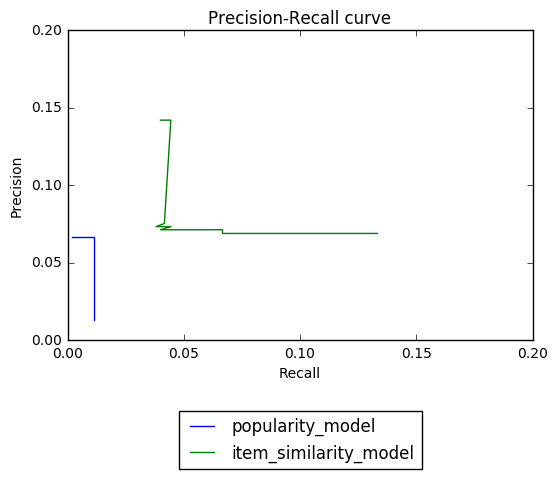

In [53]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

print("Plotting precision recall curves.")
plot_precision_recall(p_recommender_avg_precision_list, p_recommender_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")    

### Build precision recall curve for larger set of users

Plotting precision recall curves for a larger subset of data (100,000 rows) (user sample = 0.005).
Plotting precision recall curves.


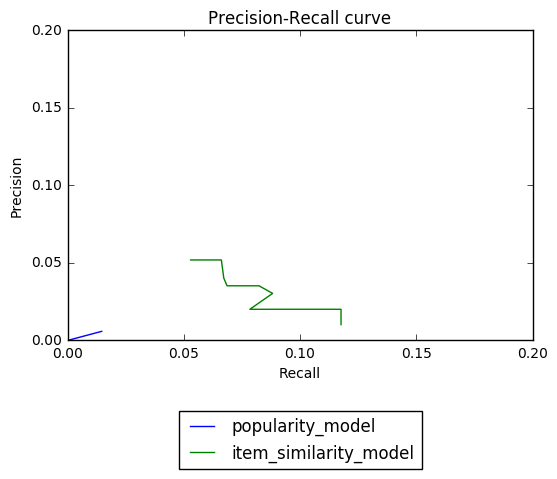

In [57]:
from sklearn.externals import joblib
print("Plotting precision recall curves for a larger subset of data (100,000 rows) (user sample = 0.005).")

#Read the persisted files 
p_recommender_avg_precision_list = joblib.load('pm_avg_precision_list_3.pkl')
p_recommender_avg_recall_list = joblib.load('pm_avg_recall_list_3.pkl')
ism_avg_precision_list = joblib.load('ism_avg_precision_list_3.pkl')
ism_avg_recall_list = joblib.load('ism_avg_recall_list_3.pkl')

print("Plotting precision recall curves.")
plot_precision_recall(p_recommender_avg_precision_list, p_recommender_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")